In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as sc
import scipy

In [3]:
slit_widths = [50, 100, 150, 200, 250, 300]
data = {}

for element in slit_widths:
    file = 'Mono/Hg_546_slit_' + str(element) + '.dig'

    df = pd.read_csv(file, skiprows=1, skipfooter=0, sep='\t', names=['Channel', 'Counts'], decimal=',')
    data[str(element)] = {}
    data[str(element)]['Channel'] = df['Channel']
    data[str(element)]['Counts'] = df['Counts']

In [4]:
def gauss(x, mu, sigma, A, B):
    return A * np.exp(-(x-mu)**2 / (2*sigma)) + B

In [5]:
params = np.zeros([6, 4])
cov = np.zeros([6, 4, 4])
u_params = np.zeros([6, 4])

for (i, element) in zip(range(6), slit_widths):
    fitx = data[str(element)]['Channel'][30:45]
    fity = data[str(element)]['Counts'][30:45]
    
    params[i, :], cov[i, :, :] = sc.curve_fit(gauss, fitx, fity, p0=[5456, 20, 1e6, 0])
    u_params[i, :] = np.sqrt(np.diagonal(cov[i, :, :]))

    print(params[i, :], u_params[i, :])

[5.45747506e+03 3.60750105e-01 1.87093009e+04 1.10753668e+02] [3.63079385e-03 1.12056880e-02 2.16734112e+02 2.84241625e+01]
[5.45650897e+03 1.00372793e+00 4.39794227e+04 2.19776226e+02] [7.48787146e-03 1.64855794e-02 2.94210481e+02 9.97927918e+01]
[ 5.45708158e+03  2.15289269e+00  7.41525756e+04 -4.23873224e+01] [2.59436057e-02 8.88195605e-02 1.20196784e+03 5.57254358e+02]
[ 5.45760926e+03  4.14116566e+00  9.34897727e+04 -1.45211649e+03] [4.47914985e-02 2.47220744e-01 2.02231400e+03 1.34268485e+03]
[ 5.45740355e+03  7.62417309e+00  1.16321171e+05 -6.73345238e+03] [6.26027824e-02 6.57450857e-01 3.45491332e+03 3.35655476e+03]
[ 5.45691653e+03  1.18083237e+01  1.26130189e+05 -1.24530521e+04] [6.71909658e-02 1.17466614e+00 4.97442748e+03 5.31090435e+03]


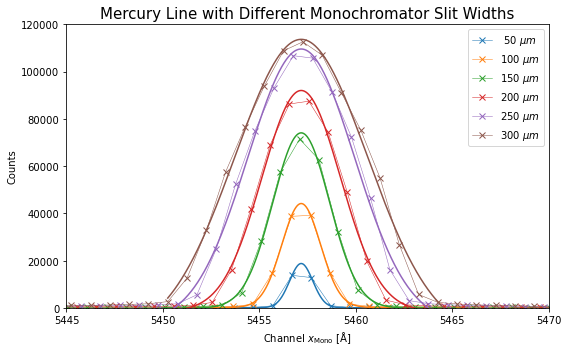

In [7]:
fig, ax = plt.subplots(figsize=(8,5))
xaxis_all = np.linspace(5450, 5465, 1001)
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

mean_pos = np.mean(params[:, 0])
dev = mean_pos - params[:, 0]

for (i, element) in zip(range(6), slit_widths):
    xaxis = xaxis_all + dev[i]
    
    plotx = data[str(element)]['Channel'] + dev[i]
    ploty = data[str(element)]['Counts']
    
    ax.plot(plotx , ploty,
            marker = 'x', lw = 0.5, color=colors[i],
            label = f'{slit_widths[i]:3.0f} $\mu m$')
    ax.plot(xaxis, gauss(xaxis_all, *params[i, :]))

ax.set_xlim([5445, 5470])
ax.set_ylim([0,120000])

ax.legend()
ax.set_xlabel(r'Channel $x_\mathrm{Mono}$ [$\mathrm{\AA}$]')
ax.set_ylabel(r'Counts')
ax.set_title(r'Mercury Line with Different Monochromator Slit Widths', size='15')
plt.tight_layout()
plt.savefig('slit_width.pdf', dpi=600)
plt.show()

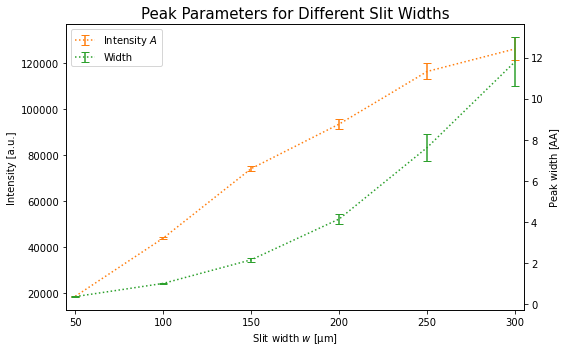

In [8]:
fig, ax1 = plt.subplots(figsize=(8,5))

ax2 = ax1.twinx()

ax1.errorbar(slit_widths, params[:, 2], yerr=u_params[:, 2], c='C1', label='Intensity $A$', capsize=4, ls=':')
ax1.errorbar([-100], [50000], yerr=1, c='C2', label='Width', capsize=4, ls=':')
ax2.errorbar(slit_widths, params[:, 1], yerr=u_params[:, 1], c='C2', label='Width $\sigma$', capsize=4, ls=':')

ax1.set_xlabel('Slit width $w$ [µm]')
ax1.set_ylabel('Intensity [a.u.]')
ax2.set_ylabel('Peak width [$\mathrm{AA}$]')

ax1.legend()

ax1.set_xlim([45, 305])


ax1.set_title(r'Peak Parameters for Different Slit Widths', size='15')
plt.tight_layout()
plt.savefig('slit_width_parameters.pdf', dpi=600)
plt.show()

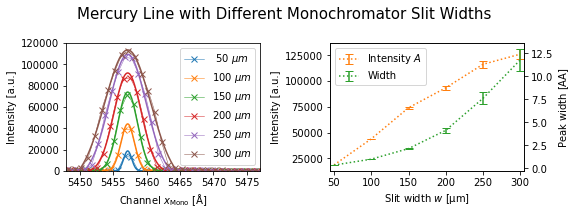

In [9]:
fig, [ax, ax1] = plt.subplots(1, 2, figsize=(8,3))
xaxis_all = np.linspace(5450, 5465, 1001)
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

mean_pos = np.mean(params[:, 0])
dev = mean_pos - params[:, 0]

for (i, element) in zip(range(6), slit_widths):
    xaxis = xaxis_all + dev[i]
    
    plotx = data[str(element)]['Channel'] + dev[i]
    ploty = data[str(element)]['Counts']
    
    ax.plot(plotx , ploty,
            marker = 'x', lw = 0.5, color=colors[i],
            label = f'{slit_widths[i]:3.0f} $\mu m$')
    ax.plot(xaxis, gauss(xaxis_all, *params[i, :]))

ax.set_xlim([5448, 5477])
ax.set_ylim([0,120000])

ax.legend()
ax.set_xlabel(r'Channel $x_\mathrm{Mono}$ [$\mathrm{\AA}$]')
ax.set_ylabel(r'Intensity [a.u.]')

fig.suptitle(r'Mercury Line with Different Monochromator Slit Widths', size='15')

ax2 = ax1.twinx()

ax1.errorbar(slit_widths, params[:, 2], yerr=u_params[:, 2], c='C1', label='Intensity $A$', capsize=4, ls=':')
ax1.errorbar([-100], [50000], yerr=1, c='C2', label='Width', capsize=4, ls=':')
ax2.errorbar(slit_widths, params[:, 1], yerr=u_params[:, 1], c='C2', label='Width $\sigma$', capsize=4, ls=':')

ax1.set_xlabel('Slit width $w$ [µm]')
ax1.set_ylabel('Intensity [a.u.]')
ax2.set_ylabel('Peak width [$\mathrm{AA}$]')

ax1.legend()

ax1.set_xlim([45, 305])

#ax1.set_title(r'Peak Parameters for Different Slit Widths', size='15')


plt.tight_layout()
plt.savefig('slit_width_all.pdf', dpi=600)
plt.show()